In [1]:
%%capture
!pip install imutils
!pip install super-gradients==3.0.7
!pip install torchinfo
!pip install Pillow
!pip install torchvision

In [1]:
import os
print(os.getcwd())

C:\Users\Mega-Pc\Downloads


In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from torchvision import transforms
from PIL import Image
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
os.chdir(r'C:\Users\Mega-Pc\Desktop\YOGA1\content\cleaned\DATASET')

print(os.getcwd())

C:\Users\Mega-Pc\Desktop\YOGA1\content\cleaned\DATASET


### Loading Train set :

In [4]:
dataset_path = os.listdir('TRAIN')

print (dataset_path)  

print("Types of classes labels found: ", len(dataset_path))

['downdog', 'goddess', 'plank', 'tree', 'warrior2']
Types of classes labels found:  5


In [5]:
class_labels = []

for item in dataset_path:
 
 all_classes = os.listdir('TRAIN' + '/' +item)
 
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))

In [6]:
df_train = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df_train.head())
print(df_train.tail())

    Labels                              image
0  downdog  dataset_path/downdog/00000128.jpg
1  downdog  dataset_path/downdog/00000129.jpg
2  downdog  dataset_path/downdog/00000130.jpg
3  downdog  dataset_path/downdog/00000131.jpg
4  downdog  dataset_path/downdog/00000132.png
        Labels                               image
1070  warrior2  dataset_path/warrior2/00000433.jpg
1071  warrior2  dataset_path/warrior2/00000434.jpg
1072  warrior2  dataset_path/warrior2/00000436.jpg
1073  warrior2  dataset_path/warrior2/00000437.jpg
1074  warrior2  dataset_path/warrior2/00000438.jpg


In [7]:
print("Total number of images in the dataset: ", len(df_train))

label_count = df_train['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  1075
plank       264
warrior2    250
downdog     223
goddess     178
tree        160
Name: Labels, dtype: int64


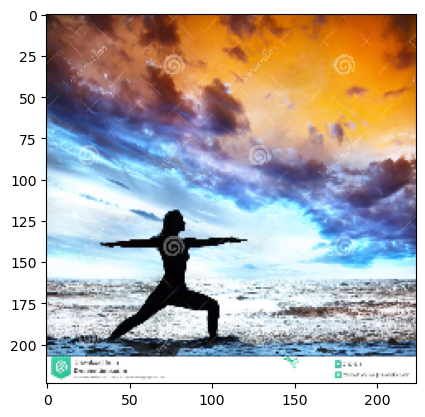

In [8]:
path = 'TRAIN/'
dataset_path = os.listdir('TRAIN')

im_size = 224

images_train = []
labels_train = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img_train = cv2.imread(data_path + '/' + f)
        img_train = cv2.resize(img_train, (im_size, im_size))
        images_train.append(img_train)
        labels_train.append(i)
        plt.imshow(img_train)

In [9]:
images_train = np.array(images_train)

images_train = images_train.astype('float32') / 255.0
images_train.shape

(1075, 224, 224, 3)

### Loading Test set :


In [10]:
dataset_path = os.listdir('TEST')

print (dataset_path)  

print("Types of classes labels found: ", len(dataset_path))

['downdog', 'goddess', 'plank', 'tree', 'warrior2']
Types of classes labels found:  5


In [11]:
class_labels = []

for item in dataset_path:
 
 all_classes = os.listdir('TEST' + '/' +item)
 
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))


In [12]:
df_test = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df_test.head())
print(df_test.tail())

    Labels                              image
0  downdog  dataset_path/downdog/00000000.jpg
1  downdog  dataset_path/downdog/00000001.JPG
2  downdog  dataset_path/downdog/00000002.jpg
3  downdog  dataset_path/downdog/00000003.jpg
4  downdog  dataset_path/downdog/00000004.jpg
       Labels                               image
461  warrior2  dataset_path/warrior2/00000113.jpg
462  warrior2  dataset_path/warrior2/00000114.jpg
463  warrior2  dataset_path/warrior2/00000115.png
464  warrior2  dataset_path/warrior2/00000116.jpg
465  warrior2  dataset_path/warrior2/00000117.jpg


In [13]:
print("Total number of images in the dataset: ", len(df_test))

label_count = df_test['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  466
plank       114
warrior2    109
downdog      97
goddess      77
tree         69
Name: Labels, dtype: int64


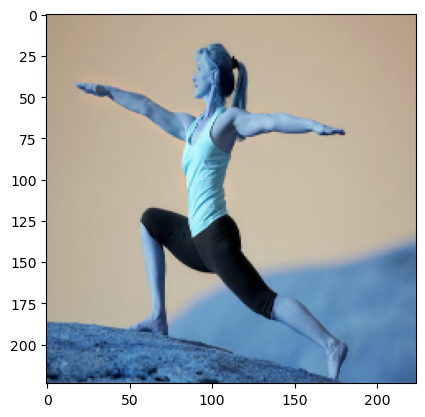

In [14]:
path = 'TEST/'
dataset_path = os.listdir('TEST')

im_size = 224

images_test = []
labels_test = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img_test = cv2.imread(data_path + '/' + f)
        img_test = cv2.resize(img_test, (im_size, im_size))
        images_test.append(img_test)
        labels_test.append(i)
        plt.imshow(img_test)

In [15]:
images_test = np.array(images_test)

images_test = images_test.astype('float32') / 255.0
images_test.shape

(466, 224, 224, 3)

### Plot :

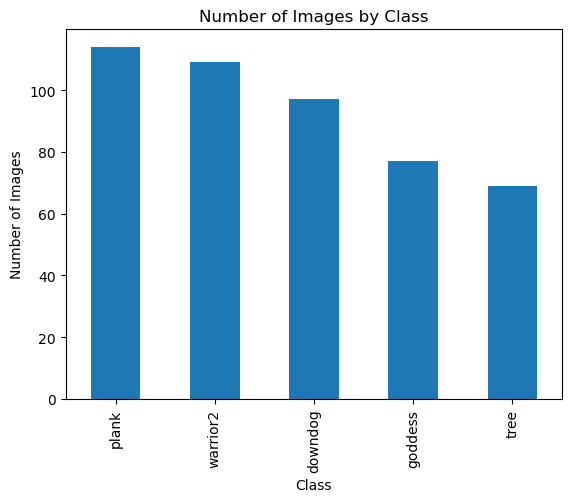

In [16]:
counts = df_test['Labels'].value_counts()

counts.plot.bar()

plt.title('Number of Images by Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')

plt.show()

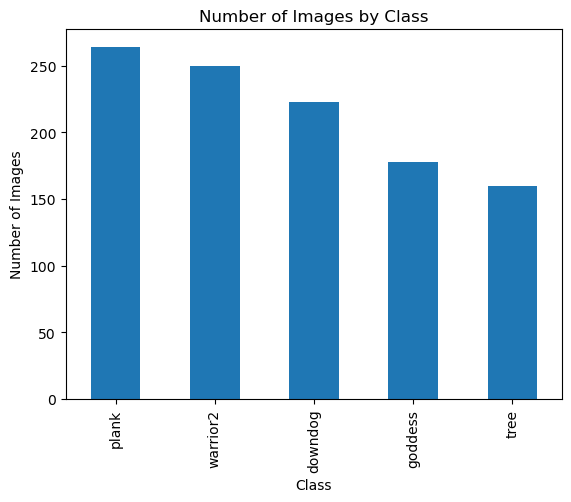

In [17]:
counts = df_train['Labels'].value_counts()

counts.plot.bar()

plt.title('Number of Images by Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')

plt.show()

### Initialize Augmentations

In [18]:
INPUT_HEIGHT=224
INPUT_WIDTH=224
IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD = [0.229, 0.224, 0.225]

resize = transforms.Resize(size=(INPUT_HEIGHT,INPUT_WIDTH))
make_tensor = transforms.ToTensor()
normalize = transforms.Normalize(mean=IMAGENET_MEAN, std=IMAGENET_STD)
center_cropper = transforms.CenterCrop((INPUT_HEIGHT,INPUT_WIDTH))
random_horizontal_flip = transforms.RandomHorizontalFlip(p=0.5)
random_vertical_flip = transforms.RandomVerticalFlip(p=0.5)
random_rotation = transforms.RandomRotation(degrees=180)
random_crop = transforms.RandomCrop(size=(INPUT_HEIGHT,INPUT_WIDTH))
random_erasing = transforms.RandomErasing()

train_transforms = transforms.Compose([
  resize, 
  center_cropper,
  random_crop,
  random_horizontal_flip,
  random_vertical_flip,
  random_rotation,
  make_tensor,
  normalize
])

test_transforms = transforms.Compose([resize, make_tensor, normalize])

Examine what the images looks like after the augmentation pipeline

In [19]:
path = 'TRAIN/'
dataset_path = os.listdir('TRAIN')

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img_train = cv2.imread(data_path + '/' + f)
#         plt.imshow(img_train)
#         plt.axis("off")
#         plt.title("Original Image")
#         plt.show()

        img_train = Image.fromarray(np.uint8(img_train))
        img_tensor = train_transforms(img_train)
        img_tensor = img_tensor.numpy().transpose((1, 2, 0))
        img_tensor = np.clip(img_tensor, 0, 1)

#         plt.imshow(img_tensor)
#         plt.axis("off")
#         plt.title("Augmented Image")
#         plt.show()


### Preprocessing : 

In [20]:
y_train=df_train['Labels'].values
y_labelencoder = LabelEncoder ()
y_train = y_labelencoder.fit_transform (y_train)

y_test=df_test['Labels'].values
y_test = y_labelencoder.fit_transform (y_test)

In [21]:
y_train = y_train.reshape(-1,1)

ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y_train = ct.fit_transform(y_train) 

In [22]:
y_test = y_test.reshape(-1,1)

ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y_test = ct.fit_transform(y_test) 

In [23]:
train_x =images_train
test_x= images_test
train_y = Y_train
test_y = Y_test

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1075, 224, 224, 3)
(1075, 5)
(466, 224, 224, 3)
(466, 5)


### Training 

We are using the EfficientNetB0 model architecture from the TensorFlow Keras Applications module to build a model for image classification with 5 classes. The model takes an input image with size 224x224 and uses transfer learning by loading pre-trained weights from ImageNet. A new output layer is added with a softmax activation function and the model is compiled using the Adam optimizer, categorical cross-entropy loss function, and accuracy metric. The model is trained on the training data (train_x and train_y) for 15 epochs and the history of the training process is stored in the "hist" variable. Finally, the summary of the model is printed using the "model.summary()" function.

In [25]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 5
IMG_SIZE = 224

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
base_model = EfficientNetB0(include_top=False, input_tensor=inputs, weights='imagenet')
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_x, train_y.toarray(), epochs=15, verbose=2)

model.summary()

Epoch 1/15
34/34 - 234s - loss: 0.5459 - accuracy: 0.8279 - 234s/epoch - 7s/step
Epoch 2/15
34/34 - 199s - loss: 0.1671 - accuracy: 0.9451 - 199s/epoch - 6s/step
Epoch 3/15
34/34 - 195s - loss: 0.1001 - accuracy: 0.9693 - 195s/epoch - 6s/step
Epoch 4/15
34/34 - 208s - loss: 0.0427 - accuracy: 0.9842 - 208s/epoch - 6s/step
Epoch 5/15
34/34 - 226s - loss: 0.0454 - accuracy: 0.9805 - 226s/epoch - 7s/step
Epoch 6/15
34/34 - 236s - loss: 0.0242 - accuracy: 0.9944 - 236s/epoch - 7s/step
Epoch 7/15
34/34 - 234s - loss: 0.0317 - accuracy: 0.9870 - 234s/epoch - 7s/step
Epoch 8/15
34/34 - 236s - loss: 0.0460 - accuracy: 0.9870 - 236s/epoch - 7s/step
Epoch 9/15
34/34 - 232s - loss: 0.0425 - accuracy: 0.9860 - 232s/epoch - 7s/step
Epoch 10/15
34/34 - 221s - loss: 0.0892 - accuracy: 0.9730 - 221s/epoch - 6s/step
Epoch 11/15
34/34 - 210s - loss: 0.1441 - accuracy: 0.9591 - 210s/epoch - 6s/step
Epoch 12/15
34/34 - 203s - loss: 0.0812 - accuracy: 0.9749 - 203s/epoch - 6s/step
Epoch 13/15
34/34 - 201s 

Now, we are evaluating the performance of a trained model on a test dataset. The first step is to use the trained model to make predictions on the test data using the predict() method. Then, the predictions are converted to class labels using the argmax() function, which returns the index of the maximum value in each prediction array. Similarly, the true labels are converted from their one-hot encoded format to class labels using argmax().

Finally, the accuracy of the model is calculated as the proportion of correctly classified samples using the mean() function along with the == operator, which compares the predicted labels to the true labels.

In [36]:
predictions = model.predict(test_x)

predicted_labels = np.argmax(predictions, axis=1)

true_labels = np.argmax(test_y.toarray(), axis=1)

accuracy = np.mean(predicted_labels == true_labels)

print(f"Test accuracy: {accuracy}")

15/15 [==============================] - 36s 1s/step
Test accuracy: 0.148068669527897


This next code is for visualizing a random test image and its predicted label using the trained model.

First, the class names are defined in a list. Then, a random test image and its corresponding label are selected.

Next, the model is used to make a prediction on the test image by calling model.predict() method on the test image array. The predicted label is obtained by using np.argmax() method on the prediction array.

Finally, the test image is displayed using matplotlib.pyplot.imshow(), with axis and title information. The title displays both the true label and the predicted label for the test image.

1/1 [==============================] - 0s 48ms/step


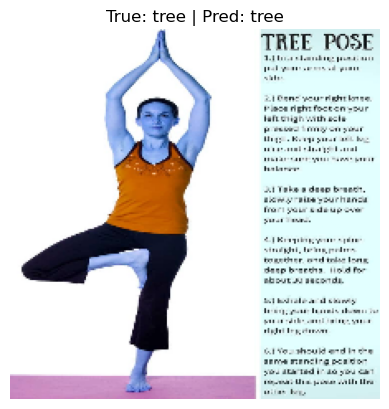

In [48]:
class_names = ["downdog", "goddess", "plank", "tree", "warrior2"] 

test_idx = np.random.randint(len(images_test))
test_image = images_test[test_idx]
test_label = labels_test[test_idx]

prediction = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(prediction)

plt.imshow(test_image)
plt.axis('off')
plt.title(f"True: {test_label} | Pred: {class_names[predicted_label]}")
plt.show()

In [52]:
input_x = tf.keras.Input(shape=(10,))
dense1 = layers.Dense(10, activation='relu')
dense2 = layers.Dense(5, activation='softmax')

x = dense1(input_x)
output = dense2(x)

model = tf.keras.Model(inputs=input_x, outputs=output)

for layer in model.layers:
    weights = layer.get_weights()
    if weights:
        print(layer.name)
        print(weights)
        

dense_3
[array([[-0.32421547, -0.01905268,  0.11326301,  0.11707956,  0.49010742,
        -0.1836519 ,  0.35248655,  0.12000626,  0.09723407,  0.42460102],
       [ 0.37585086,  0.45404637, -0.21785882,  0.3749994 , -0.07636127,
        -0.27454662, -0.10431439,  0.40551347,  0.51157176, -0.18044505],
       [-0.07546154, -0.1387932 , -0.5325893 ,  0.24442458,  0.31263435,
        -0.524208  , -0.14618954,  0.15373069,  0.1162259 , -0.23738238],
       [-0.3207929 ,  0.40789264,  0.44889885,  0.0925281 , -0.3546555 ,
        -0.11839157,  0.01931095,  0.2595902 , -0.40689445, -0.30656764],
       [-0.53624487, -0.40867078, -0.4624926 ,  0.28622788, -0.20948675,
        -0.15694913,  0.32319742,  0.20360744,  0.45477605,  0.35230672],
       [-0.1105673 ,  0.47946358,  0.5122385 ,  0.49014544, -0.27997527,
        -0.33087033, -0.22185466, -0.09445766,  0.23993862, -0.5247518 ],
       [-0.35842425,  0.34993774, -0.45702413,  0.2853365 ,  0.40624034,
        -0.37019458,  0.52847433,  0

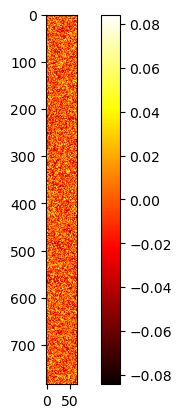

In [57]:
dense1 = model.layers[0]
weights = dense1.get_weights()[0]

weights = np.reshape(weights, (784, 64))

plt.imshow(weights, cmap='hot')
plt.colorbar()
plt.show()